In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProject_BA/DXG Historical Data 1_6.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05/31/2024,"16,800.0","16,900.0","16,950.0","16,700.0",4.88M,-0.30%
1,05/30/2024,"16,850.0","16,650.0","16,900.0","16,500.0",8.31M,0.00%
2,05/29/2024,"16,850.0","16,850.0","17,150.0","16,750.0",8.48M,0.30%
3,05/28/2024,"16,800.0","16,750.0","16,950.0","16,650.0",5.13M,1.51%
4,05/27/2024,"16,550.0","16,700.0","16,800.0","16,450.0",6.06M,-0.90%


In [4]:
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = df['Price'].str.replace(',', '', regex=True)
df['Price'] = df.Price.astype(float)
df['Date'] = pd.to_datetime(df['Date'])
df=df[::-1]

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2018-01-02,13401.4,"13,310.6","13,401.4","13,189.6",9.86M,2.78%
2018-01-03,13371.1,"13,401.4","13,522.4","13,159.4",7.43M,-0.23%
2018-01-04,13522.4,"13,431.6","13,824.9","13,401.4",8.92M,1.13%
2018-01-05,13159.4,"13,310.6","13,522.4","13,098.8",13.87M,-2.68%
2018-01-08,14066.9,"13,189.6","14,066.9","13,038.3",8.78M,6.90%


In [7]:
#Chuẩn hóa dữ liệu
df1=df.reset_index()['Price']
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.16651213],
       [0.16575483],
       [0.1695363 ],
       ...,
       [0.25270364],
       [0.25270364],
       [0.25145398]])

In [9]:
# Prepare the dataset
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [10]:
time_step = 100
X, y = create_dataset(df1, time_step)

# Split the data into train and test sets
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

In [11]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [12]:
# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

test_rmse = np.sqrt(np.mean((test_predict - y_test)**2))
print('Testing RMSE:', test_rmse)
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(test_predict, y_test)
test_mape = np.mean(np.abs(test_predict - y_test)/np.abs(test_predict))*100
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 480.66506050221705
Testing MAPE: 2.036075463376288
Testing MAE: 367.7465329341237


In [13]:
# Predict future 30 days
x_input = df1[len(df1) - time_step:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = time_step
i = 0
while (i < 90):
    if (len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        yhat = model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

In [14]:
# Inverse transform the future predictions
future_predict = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

In [15]:
future_predict

array([[17023.86327369],
       [16948.05372467],
       [17008.18561112],
       [17270.57209422],
       [17192.36674647],
       [17326.95396407],
       [17347.79399026],
       [17279.52862811],
       [17507.5204129 ],
       [17456.46717691],
       [17477.55292934],
       [17479.36902991],
       [17382.28962132],
       [17427.00288764],
       [17342.96326407],
       [17419.46996338],
       [17400.88634219],
       [17339.63242027],
       [17243.36699454],
       [17284.94813314],
       [17314.45072079],
       [17135.07176207],
       [17091.26118029],
       [17140.28518533],
       [17151.14131936],
       [17116.71021909],
       [17223.67512345],
       [17338.42648536],
       [17422.69564525],
       [17538.94543316],
       [17588.86443493],
       [17568.36327339],
       [17410.4853826 ],
       [17378.9523162 ],
       [17313.88044844],
       [17278.1650818 ],
       [17524.64344476],
       [17485.49433735],
       [17447.80785302],
       [17513.89436162],


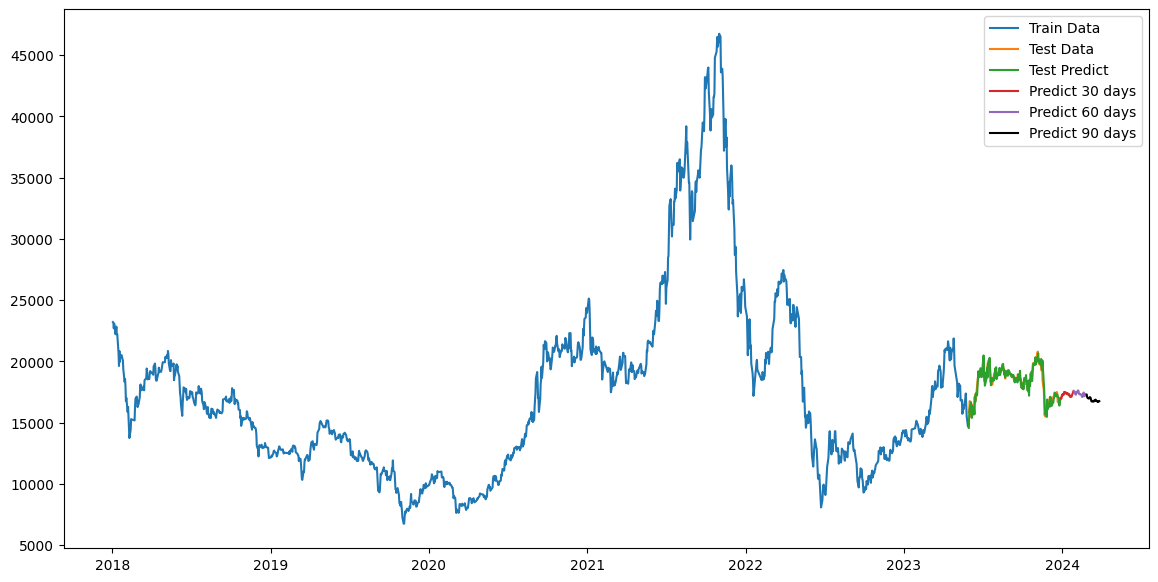

In [16]:
# Plot the results
plt.figure(figsize=(14, 7))

# Plot train data
plt.plot(df.index[:train_size], y_train, label='Train Data')

# Plot test data
plt.plot(df.index[train_size:train_size + test_size], y_test, label='Test Data')

# Plot test predict data
plt.plot(df.index[train_size:train_size + test_size], test_predict, label='Test Predict')

last_test_date = df.index[train_size + test_size - 1]
future_predict_dates = pd.date_range(start=last_test_date + pd.Timedelta(days=1), periods=30)
future_predict_dates_1 = pd.date_range(start=last_test_date + pd.Timedelta(days=31), periods=30)
future_predict_dates_2 = pd.date_range(start=last_test_date + pd.Timedelta(days=61), periods=30)

plt.plot(future_predict_dates, future_predict[0:30], label='Predict 30 days')
plt.plot(future_predict_dates_1, future_predict[30:60], label='Predict 60 days')
plt.plot(future_predict_dates_2, future_predict[60:90], label='Predict 90 days', color='black')

# Display the legend
plt.legend()

# Display the plot
plt.show()